## Анализ и визуализация данных на языке Python.

### Библиотека seaborn

#### Установка:
```
conda install seaborn --yes
```

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10, 6)})

In [2]:
tips = pd.read_csv('data/tips.csv')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Добавим процент чаевых от общей суммы счета
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### Процент чаевых

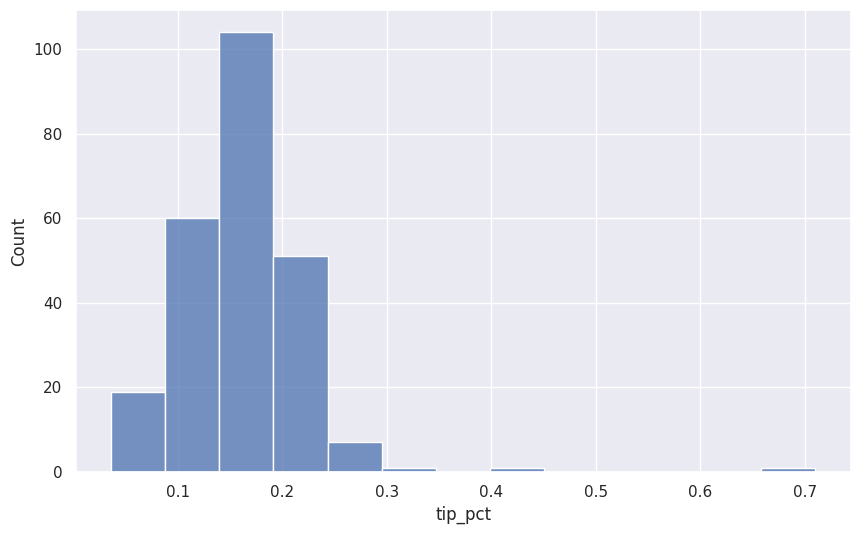

In [5]:
sns.histplot(tips["tip_pct"], binwidth=0.05);

Давайте узнаем, меняется ли процент чаевых в зависимости от времени дня.

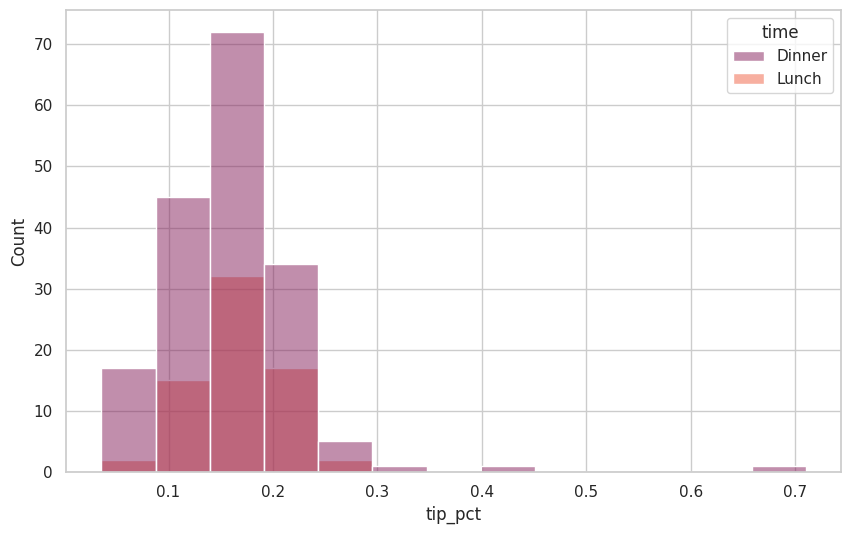

In [6]:
sns.set_style("whitegrid")
sns.histplot(data=tips, x="tip_pct", binwidth=0.05, hue="time", palette="rocket");

### Общее количество чаевых за определенный день недели

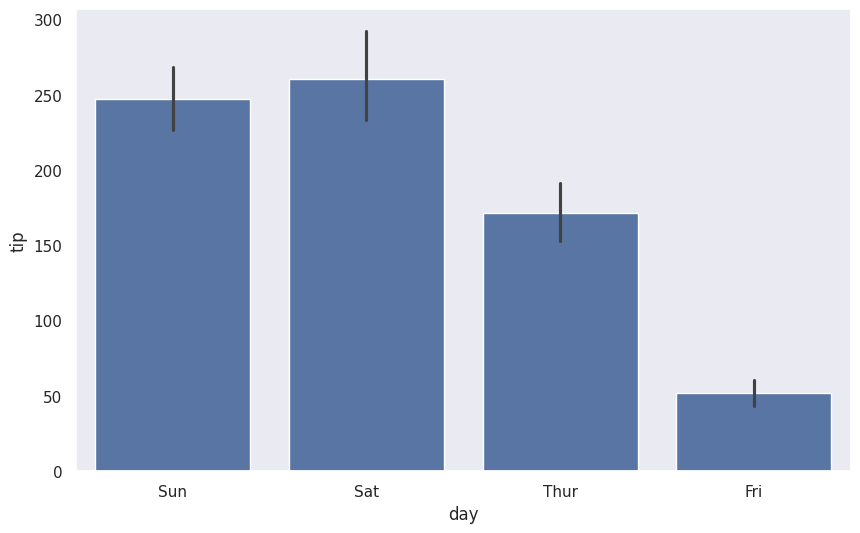

In [7]:
sns.set_style("dark")
sns.barplot(data=tips, x="day", y="tip", estimator=np.sum);

### Влияние размера столика и дня недели на чаевые

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


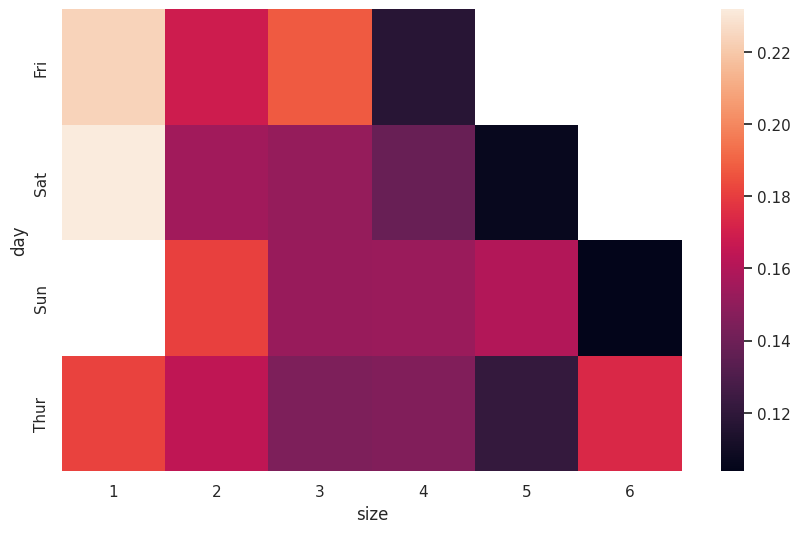

In [9]:
sns.set_style("white")
pivot = tips.pivot_table(
    index=["day"],
    columns=["size"],
    values="tip_pct",
    aggfunc=np.average)

sns.heatmap(pivot);

In [10]:
pivot

size,1,2,3,4,5,6
day,,,,,,
Fri,0.223776,0.168693,0.187735,0.117750,NaN,NaN
Sat,0.231832,0.155289,0.151439,0.138289,0.106572,NaN
Sun,NaN,0.180870,0.152662,0.153168,0.159839,0.103799
Thur,0.181728,0.163935,0.144599,0.145515,0.121389,0.173706


In [11]:
tips.query("tip_pct > 0.4")

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


In [12]:
new_pivot = tips.query("tip_pct <= 0.4").pivot_table(
    index=["day"],
    columns=["size"],
    values="tip_pct",
    aggfunc=np.average)

In [13]:
new_pivot

size,1,2,3,4,5,6
day,,,,,,
Fri,0.223776,0.168693,0.187735,0.117750,NaN,NaN
Sat,0.231832,0.155289,0.151439,0.138289,0.106572,NaN
Sun,NaN,0.160187,0.152662,0.153168,0.159839,0.103799
Thur,0.181728,0.163935,0.144599,0.145515,0.121389,0.173706


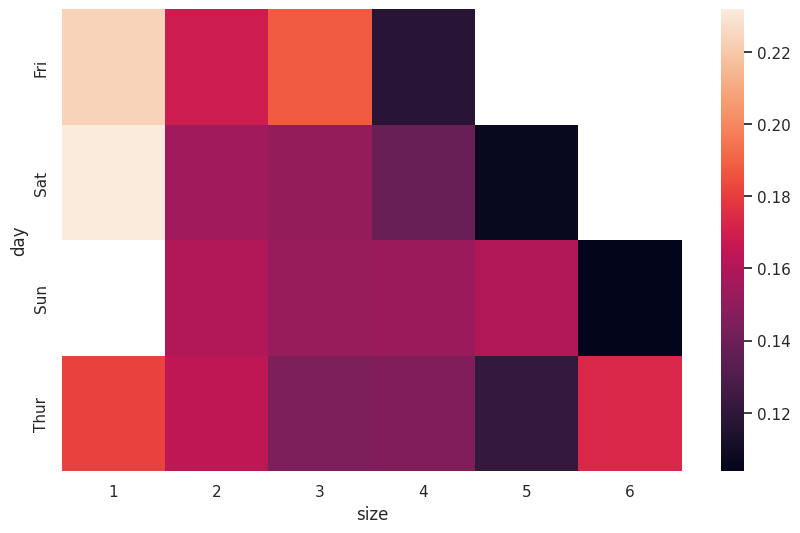

In [14]:
ax = sns.heatmap(new_pivot)
ax.get_figure().savefig("seaborn_plot2.jpg", dpi=300)

import matplotlib.pyplot as plt
plt.savefig("seaborn_plot1.jpg", dpi=300)
